### 1. Load Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### 2. Load Config

In [2]:
config = utils.load_config()

### 3. Load Training Data 

In [3]:
def load_data(config_data: dict) -> pd.DataFrame:
    x_train = utils.pickle_load(config_data[0])
    y_train = utils.pickle_load(config_data[1])
    
    x_test = utils.pickle_load(config_data[2])
    y_test = utils.pickle_load(config_data[3])
    
    train_data = pd.concat([x_train, y_train], axis = 1)
    test_data = pd.concat([x_test, y_test], axis = 1)
    
    return train_data, test_data

In [4]:
train_data, test_data = load_data(config["traintest_set_path"])

In [5]:
train_data

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
493,5,10,10,10,6,10.0,6,5,2,4
80,2,2,2,1,1,1.0,7,1,1,2
262,8,8,9,4,5,10.0,7,8,1,4
300,8,4,10,5,4,4.0,7,10,1,4
123,5,3,5,1,8,10.0,5,3,1,4
...,...,...,...,...,...,...,...,...,...,...
265,5,1,4,1,2,1.0,3,2,1,2
223,7,5,6,3,3,8.0,7,4,1,4
58,5,2,3,1,6,10.0,5,1,1,4
41,10,4,3,1,3,3.0,6,5,2,4


### 4. Balancing Class Training Data

<AxesSubplot:xlabel='Class', ylabel='Count'>

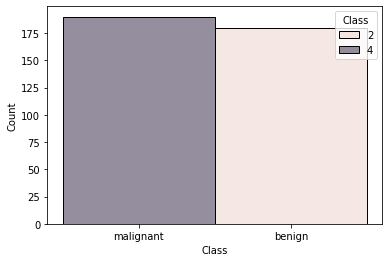

In [6]:
sns.histplot(data = train_data, x = train_data['Class'].apply(lambda x: "benign" if x==2 else "malignant"), hue="Class")

In [7]:
x_train, y_train = RandomOverSampler(random_state = 112).fit_resample(train_data.drop("Class", axis = 1), train_data.Class)

<AxesSubplot:xlabel='Class', ylabel='Count'>

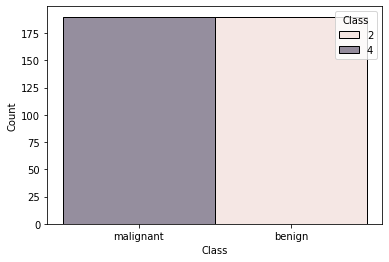

In [12]:
sns.histplot(data = pd.concat([x_train,y_train],axis=1), x = y_train.apply(lambda x: "benign" if x==2 else "malignant"), hue="Class")

### 5. Handling Missing Value

In [34]:
x_train.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    10
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy = "median")

In [ ]:
#kolom yang mengandung missing value
numerical_column = ['Bare_nuclei']
missingval_data = pd.DataFrame(x_train[numerical_column])

#fit imputer
imputer.fit(missingval_data)

#transform
imputed_data = imputer.transform(missingval_data)
numerical_data_imputed = pd.DataFrame(imputed_data)

numerical_data_imputed.columns = numerical_column
numerical_data_imputed.index = missingval_data.index

In [ ]:
x_train[numerical_column] = numerical_data_imputed

In [ ]:
data_osm = pd.concat([x_train, y_train], axis = 1)

### 6. Data Exploration

#### 6.1 Clump_thickness Distribution

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Clump_thickness, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Clump_thickness")

#### 6.2 Uniformity_of_cell_size

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Uniformity_of_cell_size, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Uniformity_of_cell_size")

#### 6.3 Uniformity_of_cell_shape

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Uniformity_of_cell_shape, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Uniformity_of_cell_shape")

#### 6.4 Marginal_adhesion

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Marginal_adhesion, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Marginal_adhesion")

#### 6.5 Single_epithelial_cell_size

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Single_epithelial_cell_size, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Single_epithelial_cell_size")

#### 6.6 Bare_nuclei

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Bare_nuclei, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Bare_nuclei")

#### 6.7 Bland_chromatin

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Bland_chromatin, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Bland_chromatin")

#### 6.8 Normal_nucleoli

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Normal_nucleoli, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Normal_nucleoli")

#### 6.9 Mitoses

In [ ]:
sns.kdeplot(data=data_sm, x = data_sm.Mitoses, hue=data_sm.Class)

In [ ]:
# Check for iqr
sns.boxplot(data = data_sm, x = "Mitoses")

In [ ]:
data_sm.Mitoses.describe()

### 7. Correlation

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(data_sm.corr(method = "spearman"), annot = True, ax = ax)

In [ ]:
sns.pairplot(
    data_sm[
        [
            "Clump_thickness",
            "Uniformity_of_cell_size",
            "Uniformity_of_cell_shape",
            "Marginal_adhesion",
            "Single_epithelial_cell_size",
            "Bare_nuclei",
            "Bland_chromatin",
            "Normal_nucleoli",
            "Mitoses",
            "Class"
        ]
    ].sample(len(data_sm)),
    hue = "Class"
)

### 8. Scaling Data

In [ ]:
# Buat fungsi
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [ ]:
x_train_clean, standardizer = standardizerData(data = x_train)

### 9. Dump to Pickle

In [ ]:
utils.pickle_dump(x_train_clean, config["train_clean_set_path"][0])
utils.pickle_dump(y_train, config["train_clean_set_path"][1])
utils.pickle_dump(imputer, config["imputer"])
utils.pickle_dump(standardizer, config["standardizer"])
